<a href="https://colab.research.google.com/github/paramsoni94/paramsoni94/blob/main/Wildlife_Population_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries imported successfully.

--- Step 1: Synthetic Data Generation Complete ---
Sample of the generated data:
   Year  HabitatLoss_sq_km  PoachingIncidents  ConservationFunding_M_USD  \
0  2000                 94                 51                          0   
1  2001                122                 44                          1   
2  2002                117                 47                          1   
3  2003                116                 47                          0   
4  2004                102                 47                          0   

   AvgTempIncrease_C  AnimalPopulation  
0                  0             40322  
1                  0             40581  
2                  0             42147  
3                  0             38942  
4                  0             42310  

--- Step 2: Exploratory Data Analysis ---

Basic statistics of the dataset:
              Year  HabitatLoss_sq_km  PoachingIncidents  \
count   100.000000         100.000000        

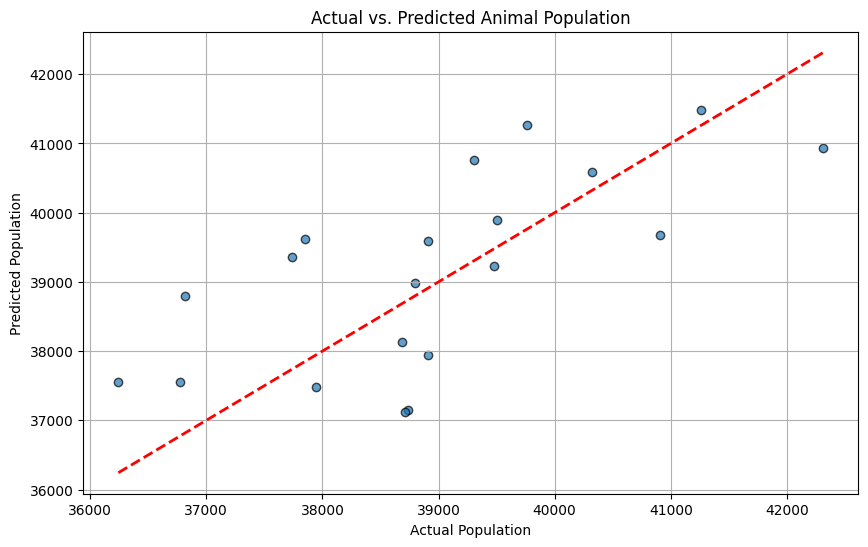


--- Step 7: Making a Prediction on New Data ---

Predicting population for the following scenario:
   HabitatLoss_sq_km  PoachingIncidents  ConservationFunding_M_USD  \
0                550                 15                        6.0   

   AvgTempIncrease_C  
0                1.8  

----> Predicted Animal Population: 36472

This prediction can serve as an early warning for conservationists to take action.


In [ ]:
# Wildlife Population Decline Prediction Model
# -------------------------------------------
#
# Inspired by the "Al-Based Wildlife Population Decline Prediction System" concept note.
# This script is a simplified, beginner-level demonstration of how machine learning
# can be used to predict wildlife populations based on various factors.
#
# It covers the following key ML steps:
# 1. Generating a synthetic dataset to simulate real-world factors.
# 2. Exploring the data to understand relationships.
# 3. Preparing the data for training a model.
# 4. Training a simple Linear Regression model.
# 5. Evaluating the model's performance.
# 6. Using the trained model to make a prediction on new, unseen data.

# --- Step 0: Import necessary libraries ---
# We'll need pandas for data handling, scikit-learn for the model, and matplotlib for plotting.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

# --- Step 1: Generate Synthetic Data ---
# In a real project, this step would involve collecting and cleaning data from
# various sources (satellite imagery, climate reports, government data, etc.).
# For this demonstration, we create a sample dataset from scratch.

# Set a seed for reproducibility, so we get the same "random" data every time.
np.random.seed(42)

# Number of data points (e.g., yearly records)
num_records = 100

# Create a dictionary to hold our data
data = {
    'Year': np.arange(2000, 2000 + num_records),
    # Simulating habitat loss in square kilometers (a negative factor)
    'HabitatLoss_sq_km': np.linspace(100, 500, num_records) + np.random.uniform(-20, 20, num_records),
    # Simulating poaching incidents (a strong negative factor)
    'PoachingIncidents': np.linspace(50, 20, num_records) + np.random.randint(-5, 5, num_records),
    # Simulating conservation funding in millions USD (a positive factor)
    'ConservationFunding_M_USD': np.linspace(1, 5, num_records) + np.random.uniform(-0.5, 0.5, num_records),
     # Simulating average temperature increase (a negative factor)
    'AvgTempIncrease_C': np.linspace(0.1, 1.5, num_records) + np.random.uniform(-0.1, 0.1, num_records)
}

# Create a DataFrame using pandas
df = pd.DataFrame(data)

# Now, we create the target variable: 'AnimalPopulation'
# The population starts high and is negatively affected by habitat loss, poaching, and temperature,
# but positively affected by funding. We add some noise to make it more realistic.
base_population = 50000
df['AnimalPopulation'] = (base_population
                         - df['HabitatLoss_sq_km'] * 25
                         - df['PoachingIncidents'] * 150
                         - df['AvgTempIncrease_C'] * 2000
                         + df['ConservationFunding_M_USD'] * 1000
                         + np.random.randint(-2000, 2000, num_records))

# Ensure population is not negative
df['AnimalPopulation'] = df['AnimalPopulation'].clip(lower=0)
df = df.astype(int)

print("\n--- Step 1: Synthetic Data Generation Complete ---")
print("Sample of the generated data:")
print(df.head())


# --- Step 2: Exploratory Data Analysis (EDA) ---
# A brief look at the data to understand its structure and relationships.
print("\n--- Step 2: Exploratory Data Analysis ---")
print("\nBasic statistics of the dataset:")
print(df.describe())

# Visualize the relationships between variables using a pairplot
print("\nGenerating pairplot to visualize data relationships...")
# sns.pairplot(df, x_vars=['HabitatLoss_sq_km', 'PoachingIncidents', 'ConservationFunding_M_USD', 'AvgTempIncrease_C'], y_vars=['AnimalPopulation'], height=4, aspect=1, kind='reg')
# plt.suptitle('Relationship between Factors and Animal Population', y=1.02)
# plt.show()


# --- Step 3: Prepare Data for Modeling ---
# We need to separate our data into features (the inputs, X) and the target (the output, y).

# Features are the factors we use to make a prediction.
features = ['HabitatLoss_sq_km', 'PoachingIncidents', 'ConservationFunding_M_USD', 'AvgTempIncrease_C']
X = df[features]

# The target is what we want to predict.
y = df['AnimalPopulation']

# Split the data into a training set (to build the model) and a testing set (to evaluate it).
# We'll use 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n--- Step 3: Data Preparation Complete ---")
print(f"Data split into {len(X_train)} training records and {len(X_test)} testing records.")


# --- Step 4: Train the Machine Learning Model ---
# We will use a simple and interpretable model: Linear Regression.
# This model finds the best-fitting straight line between the features and the target.

# Create an instance of the Linear Regression model
model = LinearRegression()

# Train the model using our training data
model.fit(X_train, y_train)

print("\n--- Step 4: Model Training Complete ---")
print("Linear Regression model has been trained.")
# You can inspect the model's learned coefficients (the importance it gives to each feature)
print("\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"- {feature}: {coef:.2f}")


# --- Step 5: Evaluate the Model ---
# Now we check how well our trained model performs on the unseen test data.

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Step 5: Model Evaluation Complete ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
print("\n* R-squared explains how much of the variation in the animal population our model can predict.")
print("* An R2 score of 1.0 is a perfect model. Ours is quite high because the synthetic data has a clear linear relationship.")


# --- Step 6: Visualize the Results ---
# A plot of actual vs. predicted values is a great way to see model performance.
# If the model is good, the points should be close to the diagonal line.

print("\n--- Step 6: Visualizing Model Performance ---")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Population")
plt.ylabel("Predicted Population")
plt.title("Actual vs. Predicted Animal Population")
plt.grid(True)
plt.show()


# --- Step 7: Make a Prediction on New Data ---
# This is the core purpose of the model: to make forecasts on new scenarios.
# Let's create a hypothetical scenario for a future year.

print("\n--- Step 7: Making a Prediction on New Data ---")
new_scenario = pd.DataFrame({
    'HabitatLoss_sq_km': [550],         # Worsening habitat loss
    'PoachingIncidents': [15],          # Poaching has been reduced
    'ConservationFunding_M_USD': [6.0], # Increased funding
    'AvgTempIncrease_C': [1.8]          # Temperature continues to rise
})

print("\nPredicting population for the following scenario:")
print(new_scenario)

# Use the trained model to make a prediction
predicted_population = model.predict(new_scenario)

print(f"\n----> Predicted Animal Population: {int(predicted_population[0])}")
print("\nThis prediction can serve as an early warning for conservationists to take action.")